In [234]:
import pickle
import copy
import time
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cur_dir = os.getcwd()
main_dir = os.path.dirname(os.path.dirname(cur_dir))

In [236]:
test_date = "08_02_2022"
test_folder = "Day2_Dynamic1"
file_name = "DateTimed_WTRUN2_day2_dynamic1_EDS"

data_dir = os.path.join(main_dir, test_date+"_Tests", "testdata", test_folder)
test_csv = os.path.join(data_dir, file_name+".csv")
test_df = pd.read_csv(test_csv, header=0)

In [306]:
abs_lift_jump1 = test_df.loc[abs(test_df["Lift (lbf)"].diff()).fillna(0).ge(0.4)] #Check if jumps significantly from previous row
abs_lift_jump1_mags = abs(test_df["Lift (lbf)"].diff()).fillna(0)
abs_lift_jump1.loc[:,'index1'] = abs_lift_jump1.index
abs_lift_jump1.loc[:,'repeats']  = abs_lift_jump1['index1'].diff().le(2)
abs_lift_jump1 = abs_lift_jump1[abs_lift_jump1['repeats'] == False]
print (abs_lift_jump1.shape)

(714, 26)


/var/folders/xn/6htkyn1918s2p78bt7v282d00000gn/T/ipykernel_77309/1313855351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abs_lift_jump1.loc[:,'index1'] = abs_lift_jump1.index
/var/folders/xn/6htkyn1918s2p78bt7v282d00000gn/T/ipykernel_77309/1313855351.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abs_lift_jump1.loc[:,'repeats']  = abs_lift_jump1['index1'].diff().le(2)


In [311]:
verified_peaks = list()

for ix in abs_lift_jump1.index:
  right_mean = np.mean(test_df["Lift (lbf)"][ix+5:ix+15])
  right_var = np.var(test_df["Lift (lbf)"][ix+5:ix+15])
  jump_impact = abs_lift_jump1_mags[ix]/right_var
  if abs(test_df["Lift (lbf)"][ix] - right_mean) > 0.45 and jump_impact > 5:
    verified_peaks.append(ix)
verified_peaks.append(21818) #Special case for Dyn15
print (len(verified_peaks))

229


In [312]:
dup_series_lift = copy.deepcopy(test_df["Lift (lbf)"])
dup_series_drag = copy.deepcopy(test_df["Drag (lbf)"])

for peak in verified_peaks:
  dup_series_lift[peak:peak+7] = np.nan
  dup_series_drag[peak:peak+7] = np.nan
  dup_series_lift = dup_series_lift.interpolate()
  dup_series_drag = dup_series_drag.interpolate()
  lift_left_std = np.std(test_df["Lift (lbf)"][peak-10:peak])
  drag_left_std = np.std(test_df["Drag (lbf)"][peak-10:peak])
  dup_series_lift[peak:peak+7] += np.random.normal(scale = lift_left_std)
  dup_series_drag[peak:peak+7] += np.random.normal(scale = drag_left_std)

In [331]:
test_df["Lift (lbf)"] = dup_series_lift
test_df["Drag (lbf)"] = dup_series_drag
test_df.to_csv(os.path.join(data_dir, "nopeaks_"+file_name+".csv"), index=False)

In [329]:
%matplotlib widget

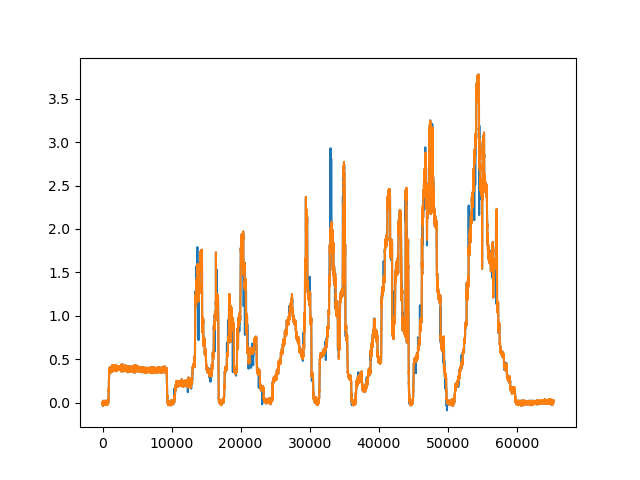

In [330]:
# plt.plot(test_df["Lift (lbf)"])
# plt.plot(dup_series_lift)
plt.plot(test_df["Drag (lbf)"])
plt.plot(dup_series_drag)